# Описание кейса
Город Сыроград известен своей фабрикой сыра — лучший
сыр в мире производится именно здесь. Этот сыр обладает
выдающимися характеристиками: он имеет большой срок
хранения и уникальный вкус. Из-за этого он недоступен
большинству граждан города.
После производства, сыр развозится по складам, которые находятся
в разных районах города. Каждый склад надежно охраняем.
Однако, в последние 2 года участились случаи кражи сыра
со склада. Полицейские не смогли понять ни по какой логике
происходят кражи (например, почему в одном районе краж больше, чем в другом), ни можно ли предсказать, где будет следующая кража.
Однако, в ходе очередного сыскного мероприятия выяснилось, что
в некоторых районах, где происходили кражи, также были разбиты
фонари. Полицейские предположили, что между фактами кражи
и хулиганства есть какая-то взаимосвязь.
Начальник полицейского участка города Сыроград предоставил
вам датасет. Ответьте на вопросы, чтобы помочь полиции
в установлении законопорядка.

# Бизнес-цель:
Статистически значимо снизить количество краж в районах города.

# Вопросы и задание:
1. Проведите разведочный анализ данных.

Сделайте основные выводы про полноту датасета.

2. Нужно ли увеличить количество полицейских,

чтобы снизить количество краж? Поясни свой ответ.

## Описание датасетов
### First_part
https://docs.google.com/spreadsheets/
d/1JkevCnJrPzzVnhC4FMRunBVWs_g5q9mqMYxKXnXPogI/edit?
usp=sharing

Date: Дата.

District: Район города.

Warehouse_Name: Название склада.

Number_of_Guards: Количество охраны на складе.

Police_Units: Количество полицейских на район.

### Second_part
https://docs.google.com/spreadsheets/d/12ENNpZ18t2-
aBX2nAIjYSwV3hOeaW6Sjdcysy4IeqTc/edit?usp=sharing

Date: Дата.

District: Район города.

Warehouse_Name: Название склада.

Percent_of_Crime_Solved: Процент раскрытых

преступлений по уничтожению фонарей в районе.

Number_of_Lights: Количество фонарей в районе.

# 1. Разведочный анализ данных

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as sm

In [2]:
# Загрузка первого датасета
first_part = pd.read_csv("first_part (2).csv")

In [3]:
# Просмотр структуры данных
first_part.head(10)

,Date,District,Warehouse_Name,Number_of_Guards,Police_Units
0,2024-01-26,Мышеостровский,Колбасовы,7,6
1,2024-01-26,Мышеостровский,Молочковы,10,9
2,2024-01-26,Мышеостровский,Мятновы,8,8
3,2024-01-26,Мышеостровский,Сметанинковы,8,7
4,2024-01-26,Краснокотейский,Колбасовы,7,6
5,2024-01-26,Краснокотейский,Молочковы,6,4
6,2024-01-26,Краснокотейский,Мятновы,7,6
7,2024-01-26,Краснокотейский,Сметанинковы,2,1
8,2024-01-26,Мышесельский,Колбасовы,6,4
9,2024-01-26,Мышесельский,Молочковы,2,1


In [4]:
# Просмотр типов и полноты данных
first_part.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17280 entries, 0 to 17279
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              17280 non-null  object
 1   District          17280 non-null  object
 2   Warehouse_Name    17280 non-null  object
 3   Number_of_Guards  17280 non-null  int64 
 4   Police_Units      17280 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 675.1+ KB


In [5]:
# Изменение типа данных на timedelta для столбца 'Date'
first_part['Date'] = pd.to_datetime(first_part['Date'])

In [6]:
# Проверка датасета на дубликаты
first_part.duplicated().sum()

0

* Итого имеется датасет на 17280 строк, без пропусков и дубликатов. Изучим подробнее данные 

In [7]:
# Просмотр первой и последней даты таблицы
print(first_part['Date'].min(),'-',first_part['Date'].max())

2022-02-06 00:00:00 - 2024-01-26 00:00:00


In [8]:
# Просмотр распределения данных по районам
first_part['District'].value_counts()

Мышеостровский     2880
Краснокотейский    2880
Мышесельский       2880
Петрокотский       2880
Приморский         2880
Невский            2880
Name: District, dtype: int64

In [9]:
# Распределение дат по районам
first_part.groupby('District')['Date'].nunique()

District
Краснокотейский    720
Мышеостровский     720
Мышесельский       720
Невский            720
Петрокотский       720
Приморский         720
Name: Date, dtype: int64

In [10]:
# Распределение складов по районам
first_part.groupby('District')['Warehouse_Name'].unique()

District
Краснокотейский    [Колбасовы, Молочковы, Мятновы, Сметанинковы]
Мышеостровский     [Колбасовы, Молочковы, Мятновы, Сметанинковы]
Мышесельский       [Колбасовы, Молочковы, Мятновы, Сметанинковы]
Невский            [Колбасовы, Молочковы, Мятновы, Сметанинковы]
Петрокотский       [Колбасовы, Молочковы, Мятновы, Сметанинковы]
Приморский         [Колбасовы, Молочковы, Мятновы, Сметанинковы]
Name: Warehouse_Name, dtype: object

In [11]:
# Распределение количества охраны и среднее количество охраны на каждый склад
first_part.groupby(['District', 'Warehouse_Name'])['Number_of_Guards'].agg(['unique', 'mean'])

unique      mean
District        Warehouse_Name                                               
Краснокотейский Колбасовы       [7, 4, 6, 3, 8, 10, 2, 9, 5, 1, 11]  5.875000
                Молочковы       [6, 4, 9, 5, 8, 10, 7, 3, 2, 11, 1]  5.847222
                Мятновы         [7, 2, 4, 3, 9, 6, 5, 10, 11, 8, 1]  6.073611
                Сметанинковы    [2, 10, 4, 8, 11, 6, 9, 5, 3, 7, 1]  5.961111
Мышеостровский  Колбасовы       [7, 9, 2, 6, 11, 4, 3, 1, 8, 10, 5]  6.151389
                Молочковы       [10, 7, 4, 8, 1, 3, 5, 9, 6, 11, 2]  5.958333
                Мятновы         [8, 4, 1, 3, 11, 5, 2, 6, 10, 7, 9]  5.970833
                Сметанинковы    [8, 10, 2, 3, 9, 4, 5, 7, 6, 11, 1]  5.923611
Мышесельский    Колбасовы       [6, 4, 10, 2, 3, 11, 7, 8, 5, 9, 1]  5.959722
                Молочковы       [2, 6, 8, 3, 1, 5, 9, 11, 4, 7, 10]  5.886111
                Мятновы         [10, 8, 4, 11, 6, 2, 3, 9, 7, 5, 1]  6.045833
                Сметанинковы    [5, 9, 3, 1, 6, 10, 2, 4, 8, 11, 7]  5.975000
Невский         Колбасовы       [2, 6, 4, 5, 9, 10, 8, 3, 11, 7, 1]  5.868056
                Молочковы       [2, 7, 4, 8, 6, 10, 9, 11, 1, 3, 5]  5.927778
                Мятновы         [10, 6, 8, 7, 3, 11, 4, 2, 5, 9, 1]  6.097222
                Сметанинковы    [1, 6, 9, 5, 2, 7, 10, 11, 8, 4, 3]  6.100000
Петрокотский    Колбасовы       [9, 4, 7, 8, 11, 5, 10, 2, 3, 6, 1]  6.051389
                Молочковы       [10, 7, 1, 6, 4, 3, 11, 9, 5, 8, 2]  6.148611
                Мятновы         [3, 8, 4, 1, 7, 10, 2, 9, 6, 5, 11]  6.052778
                Сметанинковы    [3, 8, 9, 4, 7, 5, 1, 6, 11, 2, 10]  5.838889
Приморский      Колбасовы       [5, 7, 3, 4, 9, 10, 6, 2, 11, 8, 1]  5.926389
                Молочковы       [5, 9, 7, 4, 2, 6, 1, 10, 3, 8, 11]  6.084722
                Мятновы         [6, 2, 4, 9, 1, 7, 11, 8, 5, 3, 10]  5.934722
                Сметанинковы    [8, 9, 7, 5, 11, 1, 10, 6, 4, 3, 2]  5.965278

In [12]:
# Распределение количества полицейских и среднее количество полиции на каждый склад
first_part.groupby(['District', 'Warehouse_Name'])['Police_Units'].agg(['unique', 'mean'])

unique      mean
District        Warehouse_Name                                       
Краснокотейский Колбасовы       [6, 4, 1, 8, 2, 7, 9, 3, 5]  4.886111
                Молочковы       [4, 7, 8, 6, 1, 3, 2, 9, 5]  4.844444
                Мятновы         [6, 1, 4, 3, 2, 9, 7, 5, 8]  5.068056
                Сметанинковы    [1, 8, 4, 3, 9, 6, 7, 5, 2]  4.895833
Мышеостровский  Колбасовы       [6, 8, 2, 4, 9, 3, 5, 1, 7]  5.137500
                Молочковы       [9, 6, 3, 7, 8, 2, 1, 4, 5]  4.959722
                Мятновы         [8, 2, 4, 1, 3, 9, 5, 6, 7]  4.927778
                Сметанинковы    [7, 9, 2, 1, 8, 3, 5, 6, 4]  4.979167
Мышесельский    Колбасовы       [4, 8, 3, 9, 2, 5, 1, 6, 7]  5.005556
                Молочковы       [1, 4, 6, 2, 3, 5, 8, 7, 9]  4.881944
                Мятновы         [8, 6, 4, 9, 1, 7, 3, 2, 5]  4.995833
                Сметанинковы    [4, 7, 3, 1, 5, 6, 9, 8, 2]  4.956944
Невский         Колбасовы       [2, 4, 5, 8, 6, 3, 7, 9, 1]  4.851389
                Молочковы       [2, 7, 5, 3, 6, 4, 8, 1, 9]  4.938889
                Мятновы         [8, 5, 6, 2, 7, 9, 4, 3, 1]  5.104167
                Сметанинковы    [1, 5, 6, 8, 2, 9, 4, 3, 7]  5.073611
Петрокотский    Колбасовы       [8, 3, 5, 6, 9, 4, 2, 7, 1]  5.066667
                Молочковы       [9, 5, 1, 6, 2, 3, 7, 4, 8]  5.119444
                Мятновы         [1, 3, 6, 4, 5, 2, 8, 9, 7]  5.080556
                Сметанинковы    [1, 6, 9, 4, 7, 5, 3, 2, 8]  4.820833
Приморский      Колбасовы       [3, 5, 1, 4, 9, 2, 7, 6, 8]  4.984722
                Молочковы       [4, 9, 5, 8, 3, 2, 1, 6, 7]  5.119444
                Мятновы         [4, 1, 3, 7, 5, 9, 8, 2, 6]  4.911111
                Сметанинковы    [7, 9, 5, 3, 8, 6, 1, 4, 2]  4.965278

* Итого в первой таблице данные распределены равномерно для каждого района и склада, на каждый из 6 районов приходится по 4 склада, на каждый склад от 1 до 11 охранников с средним значением в 6 охранников и полиции от 1 до 9 с средним в 5 полицейских.

In [13]:
# Загрузка второго датасета
second_part = pd.read_csv("second_part (2).csv")

In [14]:
# Просмотр структуры второго датасета
second_part.head(10)

,Date,District,Warehouse_Name,Percent_of_Crime_Solved,Number_of_Lights
0,2024-01-26,Мышеостровский,Колбасовы,83.160960,725
1,2024-01-26,Мышеостровский,Молочковы,87.756487,984
2,2024-01-26,Мышеостровский,Мятновы,87.010121,1030
3,2024-01-26,Мышеостровский,Сметанинковы,82.207203,814
4,2024-01-26,Краснокотейский,Колбасовы,86.684716,1035
5,2024-01-26,Краснокотейский,Молочковы,88.330627,631
6,2024-01-26,Краснокотейский,Мятновы,82.618815,831
7,2024-01-26,Краснокотейский,Сметанинковы,83.489159,1034
8,2024-01-26,Мышесельский,Колбасовы,83.273985,716
9,2024-01-26,Мышесельский,Молочковы,82.204971,614


In [15]:
# Просмотр типов данных и полноты второго датасета
second_part.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17280 entries, 0 to 17279
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     17280 non-null  object 
 1   District                 17280 non-null  object 
 2   Warehouse_Name           17280 non-null  object 
 3   Percent_of_Crime_Solved  17280 non-null  float64
 4   Number_of_Lights         17280 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 675.1+ KB


In [16]:
# Изменение типа данных на timedelta для столбца 'Date'
second_part['Date'] = pd.to_datetime(second_part['Date'])

In [17]:
# Проверка на дубликаты
second_part.duplicated().sum()

0

In [18]:
# Просмотр первой и последней даты датасета
print(second_part['Date'].min(),'-',second_part['Date'].max())

2022-02-06 00:00:00 - 2024-01-26 00:00:00


In [19]:
#минимальный, максимальный процент раскрытых преступлений по уничтожению фонарей в районе и их 
#средний процент на каждый склад
second_part.groupby(['District', 'Warehouse_Name'])['Percent_of_Crime_Solved'].agg(['min', 'max', 'mean'])

min    max       mean
District        Warehouse_Name                            
Краснокотейский Колбасовы       1.686968  100.0  68.996260
                Молочковы       1.686968  100.0  69.054328
                Мятновы         1.686968  100.0  69.257332
                Сметанинковы    1.686968  100.0  68.939339
Мышеостровский  Колбасовы       1.686968  100.0  69.168210
                Молочковы       1.686968  100.0  69.040801
                Мятновы         1.686968  100.0  69.152006
                Сметанинковы    1.686968  100.0  69.200337
Мышесельский    Колбасовы       1.686968  100.0  69.195719
                Молочковы       1.686968  100.0  69.052525
                Мятновы         1.686968  100.0  69.314685
                Сметанинковы    1.686968  100.0  69.202944
Невский         Колбасовы       1.686968  100.0  69.169266
                Молочковы       1.686968  100.0  68.942565
                Мятновы         1.686968  100.0  69.113544
                Сметанинковы    1.686968  100.0  69.133955
Петрокотский    Колбасовы       1.686968  100.0  69.116445
                Молочковы       1.686968  100.0  68.930228
                Мятновы         1.686968  100.0  69.111505
                Сметанинковы    1.686968  100.0  69.002666
Приморский      Колбасовы       1.686968  100.0  69.151564
                Молочковы       1.686968  100.0  69.238778
                Мятновы         1.686968  100.0  69.026232
                Сметанинковы    1.686968  100.0  69.159209

In [20]:
#минимальное, максимальное Количество фонарей в районе и их среднее кол-во на каждый склад
second_part.groupby(['District', 'Warehouse_Name'])['Number_of_Lights'].agg(['min', 'max', 'mean'])

min   max        mean
District        Warehouse_Name                       
Краснокотейский Колбасовы       210  1372  703.577778
                Молочковы       199  1334  703.587500
                Мятновы         256  1355  704.143056
                Сметанинковы    276  1259  701.094444
Мышеостровский  Колбасовы       294  1337  698.097222
                Молочковы       258  1277  707.693056
                Мятновы         210  1423  696.944444
                Сметанинковы    238  1334  693.820833
Мышесельский    Колбасовы       204  1360  698.166667
                Молочковы       243  1509  686.223611
                Мятновы         277  1307  700.736111
                Сметанинковы    297  1356  695.880556
Невский         Колбасовы       242  1300  702.480556
                Молочковы       274  1430  687.130556
                Мятновы         230  1224  698.568056
                Сметанинковы    285  1363  697.043056
Петрокотский    Колбасовы       151  1352  700.484722
                Молочковы       249  1422  696.565278
                Мятновы         231  1619  696.472222
                Сметанинковы    281  1294  697.518056
Приморский      Колбасовы       302  1372  703.031944
                Молочковы       242  1280  691.158333
                Мятновы         193  1366  695.765278
                Сметанинковы    274  1536  695.036111

* Во втрой таблице данные также распределены довольно равномерно относительно каждого района и склада, средний процент раскрытых преступлений 69% для каждого района и среднее кол-во фонарей 700. Посмотри также эти распределения на графике боксплот

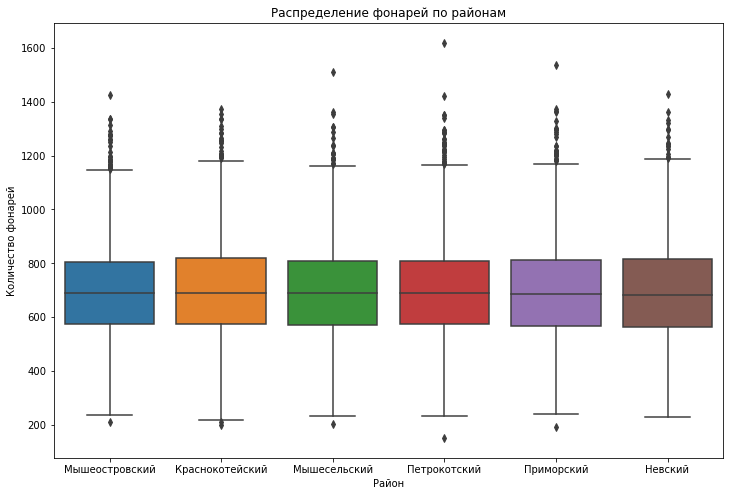

In [21]:
# Посмотрим как распределено кол-во фонарей для каждого района
plt.figure(figsize=(12, 8))
sns.boxplot(x=second_part['District'], y=second_part['Number_of_Lights'], data=second_part)
plt.title('Распределение фонарей по районам')
plt.xlabel('Район')
plt.ylabel('Количество фонарей')
plt.show()

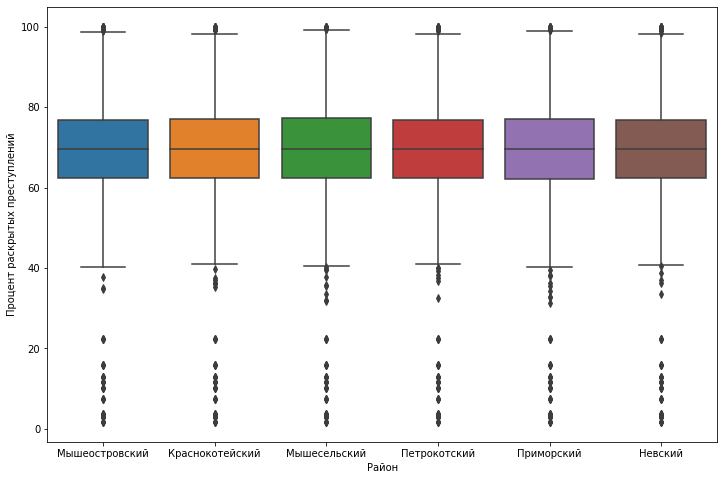

In [22]:
# Посмотрим как распределен процент раскрытых преступлений для каждого района
plt.figure(figsize=(12, 8))
sns.boxplot(x=second_part['District'], y=second_part['Percent_of_Crime_Solved'], data=second_part)
plt.xlabel('Район')
plt.ylabel('Процент раскрытых преступлений')
plt.show()

## Выводы по датасетам
Есть два датасета со схожей структурой, без пропусков и дубликатов. Данные по кол-ву охраны и полиции имеют одинаковое распределение для каждого района, тоже самое по количеству фонарей и проценту раскрытых преступлений по уничтожению фонарей в районе, ни на одном районе или складе не было заметных отличий по этим показателям от других. Хотя в данных нету столбца по количеству краж со складов на районах, без которого нет возможности сделать вывод как количество полиции влияет на кол-во краж, я попробую посмотреть влияние полиции и кол-ва охраны на процент раскрытых преступлений по уничтожению фонарей и возможно можно будет сделать выводы из этого влияния

# 2. Исследовательский анализ данных
Анализ влияния кол-ва полиции и кол-ва охраны на процент раскрытых преступлений по уничтожению фонарей

In [23]:
# Обьединим обе таблицы в одну так как обе имеют одинаковое кол-во данных и одинаковую структуру
merged_df = pd.merge(first_part, second_part, on=['Date', 'District', 'Warehouse_Name'], how='left')

In [24]:
# Просмотр получившийся таблицы
merged_df

,Date,District,Warehouse_Name,Number_of_Guards,Police_Units,Percent_of_Crime_Solved,Number_of_Lights
0,2024-01-26,Мышеостровский,Колбасовы,7,6,83.160960,725
1,2024-01-26,Мышеостровский,Молочковы,10,9,87.756487,984
2,2024-01-26,Мышеостровский,Мятновы,8,8,87.010121,1030
3,2024-01-26,Мышеостровский,Сметанинковы,8,7,82.207203,814
4,2024-01-26,Краснокотейский,Колбасовы,7,6,86.684716,1035
...,...,...,...,...,...,...,...
17275,2022-02-06,Приморский,Сметанинковы,2,1,81.011802,623
17276,2022-02-06,Невский,Колбасовы,11,9,86.025656,977
17277,2022-02-06,Невский,Молочковы,10,8,84.417517,947
17278,2022-02-06,Невский,Мятновы,5,5,77.931469,760


* В начале хочу посмотреть динамику параметров таблицы во времени, как они изменялись, так как данных много посмотрю в разрезе месяцов

In [25]:
# Добавил столбец номера месяца
merged_df['Month'] = (merged_df['Date'].dt.year - merged_df['Date'].dt.year.min()) * 12 + merged_df['Date'].dt.month

In [26]:
merged_df['Month'].unique()

array([25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,
        8,  7,  6,  5,  4,  3,  2], dtype=int64)

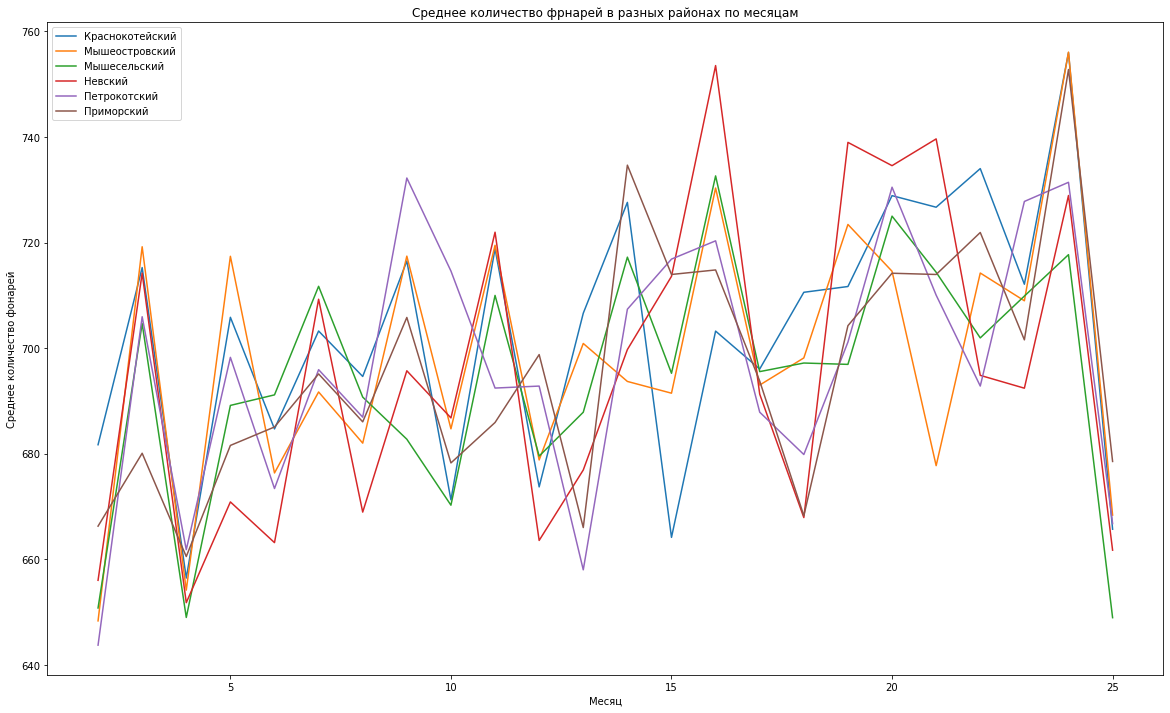

In [27]:
# График среднего кол-ва фонарей по районам по каждому месяцу
# Группировка данных по районам и месяцам и вычисление среднего значения для каждой группы
grouped_data = merged_df.groupby(['District', 'Month'])['Number_of_Lights'].mean().reset_index()
grouped_data = grouped_data.sort_values(by='Month')
# Построение графика
plt.figure(figsize=(20, 12))

# График для каждого района
for place, group in grouped_data.groupby('District'):
    plt.plot(group['Month'], group['Number_of_Lights'], label=place)

plt.xlabel('Месяц')
plt.ylabel('Среднее количество фонарей')
plt.title('Среднее количество фрнарей в разных районах по месяцам')
plt.legend()
plt.show()

* о какой то упорядоченной структуре или динамике здесь говорить тяжело показатели довольно волатильны для всех районов

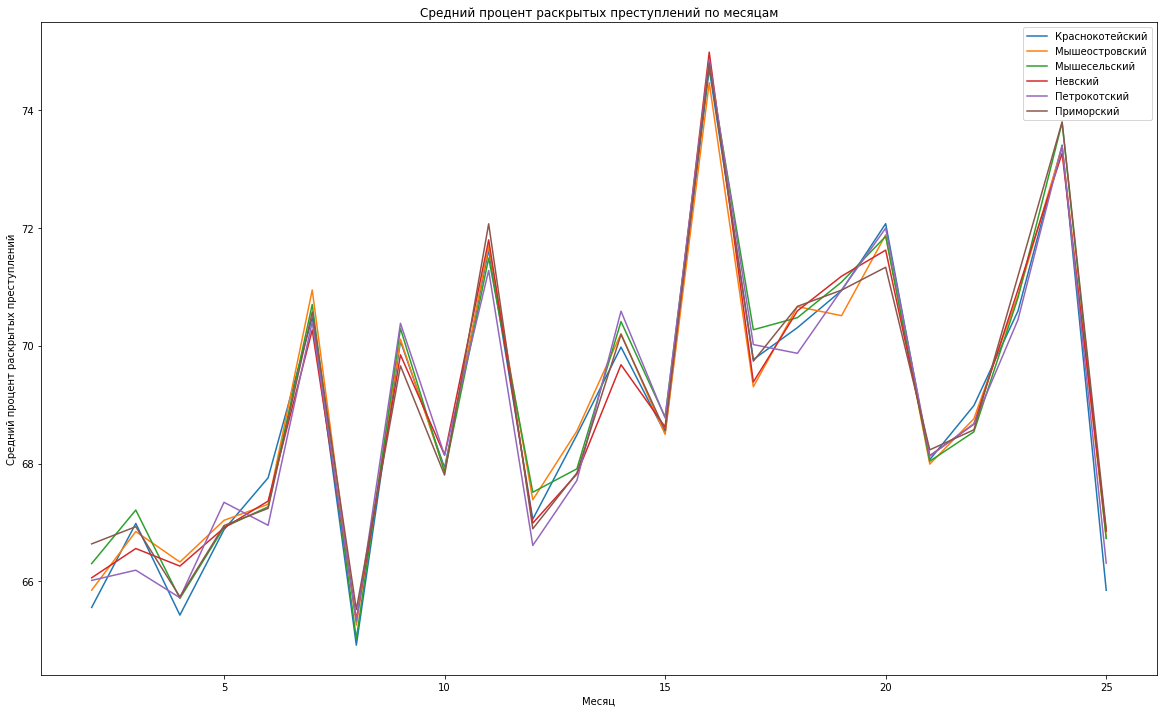

In [28]:
# График среднего процента раскрытых преступлений по районам по каждому месяцу
# Группировка данных по местам и месяцам и вычисление среднего значения для каждой группы
grouped_data = merged_df.groupby(['District', 'Month'])['Percent_of_Crime_Solved'].mean().reset_index()
grouped_data = grouped_data.sort_values(by='Month')
# Построение графика
plt.figure(figsize=(20, 12))

# График для каждого места
for place, group in grouped_data.groupby('District'):
    plt.plot(group['Month'], group['Percent_of_Crime_Solved'], label=place)

plt.xlabel('Месяц')
plt.ylabel('Средний процент раскрытых преступлений')
plt.title('Средний процент раскрытых преступлений по месяцам')
plt.legend()
plt.show()

* Здесь показатель также волатилен от месяца к месяцу но прослеживается что для каждого района средний процент раскрытых преступлений довольно схож

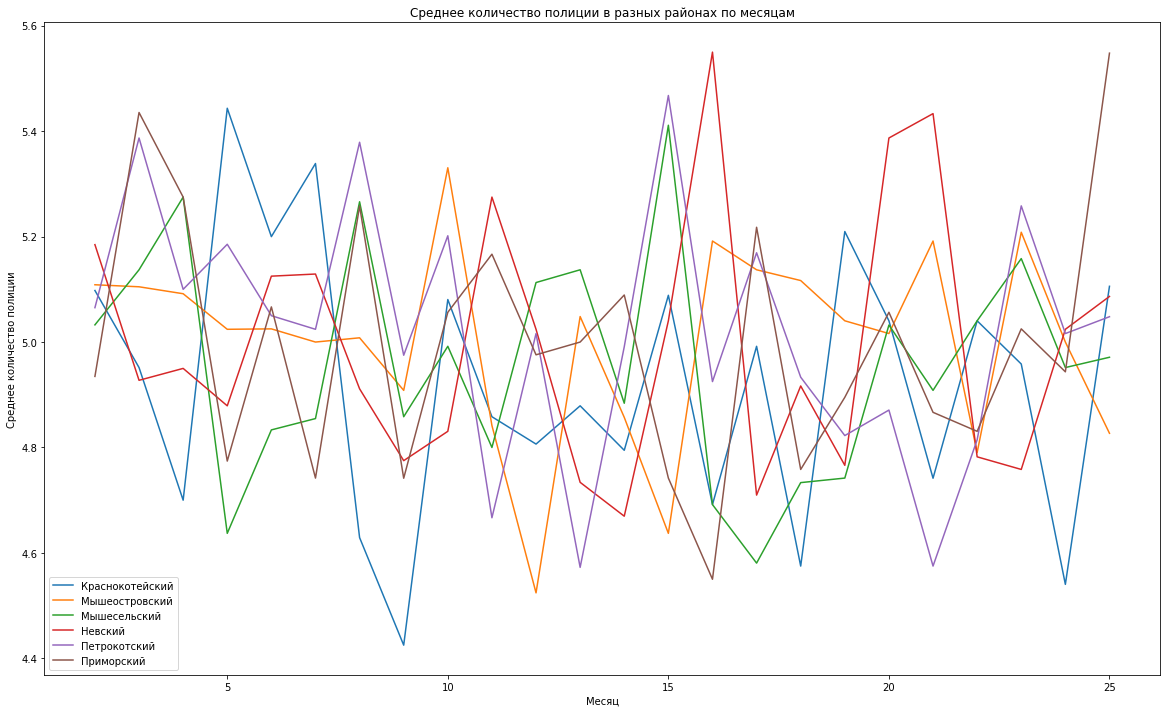

In [29]:
# График среднего кол-ва полиции по районам по каждому месяцу
# Группировка данных по местам и месяцам и вычисление среднего значения для каждой группы
grouped_data = merged_df.groupby(['District', 'Month'])['Police_Units'].mean().reset_index()
grouped_data = grouped_data.sort_values(by='Month')
# Построение графика
plt.figure(figsize=(20, 12))

# График для каждого места
for place, group in grouped_data.groupby('District'):
    plt.plot(group['Month'], group['Police_Units'], label=place)

plt.xlabel('Месяц')
plt.ylabel('Среднее количество полиции')
plt.title('Среднее количество полиции в разных районах по месяцам')
plt.legend()
plt.show()

* Здесь не прослеживается никакой динамики и структуры тоже, для каждого района среднее кол-во полицейских было волатильно. Никаких полезных выводов из графиков сделать не получается, посмотрим зависимость параметров между собой на скаттерплоте

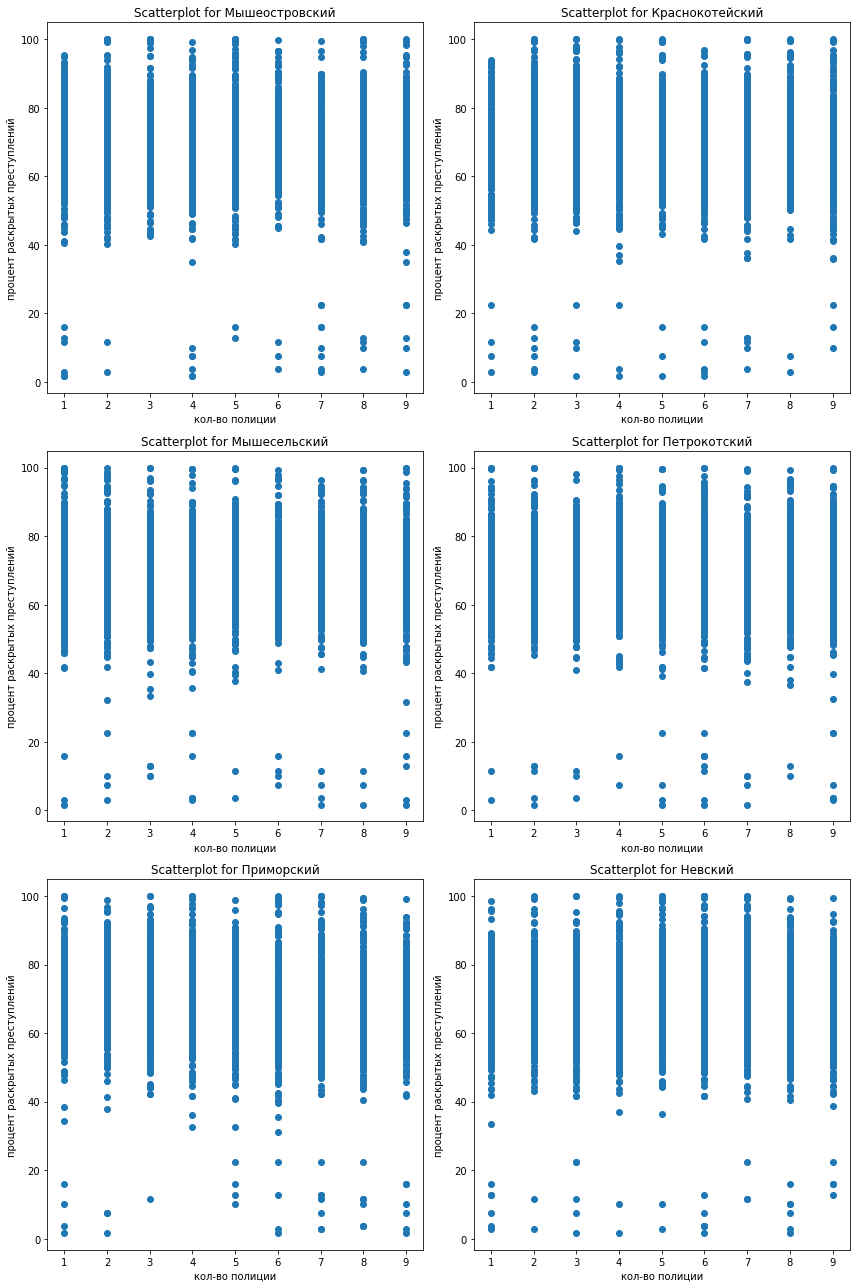

In [30]:
# Построим график скаттерполот для визуализации распределения процента раскрытых преступлений в зависимости 
# от кол-ва полиции на районе, отдельно по каждому району
districts = merged_df['District'].unique()
num_rows = len(districts) // 2 + len(districts) % 2  
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 6 * num_rows))
for i, district in enumerate(districts):
    row = i // num_cols
    col = i % num_cols
    subset = merged_df[merged_df['District'] == district]
    axes[row, col].scatter(subset['Police_Units'], subset['Percent_of_Crime_Solved'])
    axes[row, col].set_title(f'Scatterplot for {district}')
    axes[row, col].set_xlabel('кол-во полиции')
    axes[row, col].set_ylabel('процент раскрытых преступлений')
plt.tight_layout()
plt.show()

* Здесь мы видим что зависимости от кол-во полиции на районе и процента раскрытых преступлений не видно

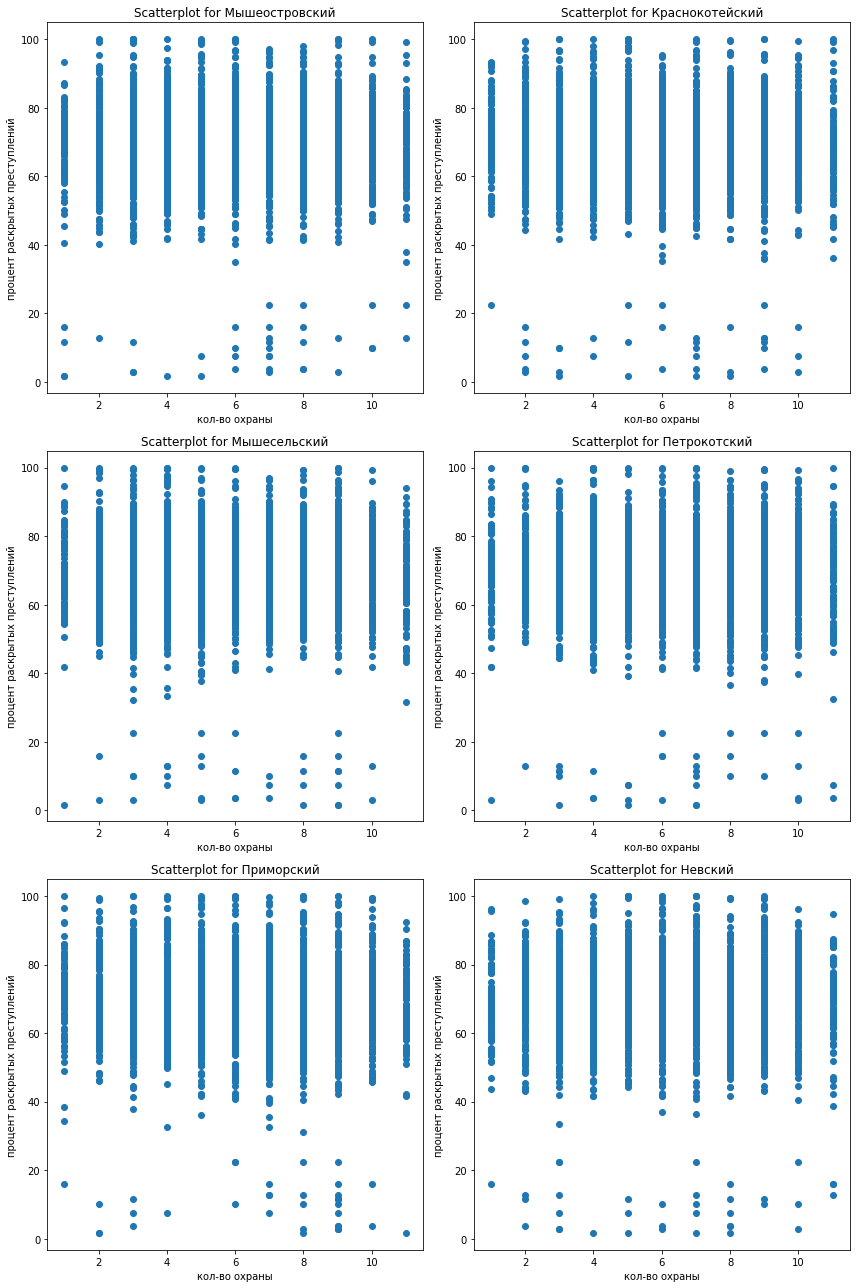

In [31]:
# Построим график скаттерполот для визуализации распределения процента раскрытых преступлений в зависимости 
# от кол-ва охраны на районе, отдельно по каждому району
districts = merged_df['District'].unique()
num_rows = len(districts) // 2 + len(districts) % 2  
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 6 * num_rows))
for i, district in enumerate(districts):
    row = i // num_cols
    col = i % num_cols
    subset = merged_df[merged_df['District'] == district]
    axes[row, col].scatter(subset['Number_of_Guards'], subset['Percent_of_Crime_Solved'])
    axes[row, col].set_title(f'Scatterplot for {district}')
    axes[row, col].set_xlabel('кол-во охраны')
    axes[row, col].set_ylabel('процент раскрытых преступлений')
plt.tight_layout()
plt.show()

* Не видно зависимости и между кол-вом охраны и процентом раскрытых преступлений ни на одном районе

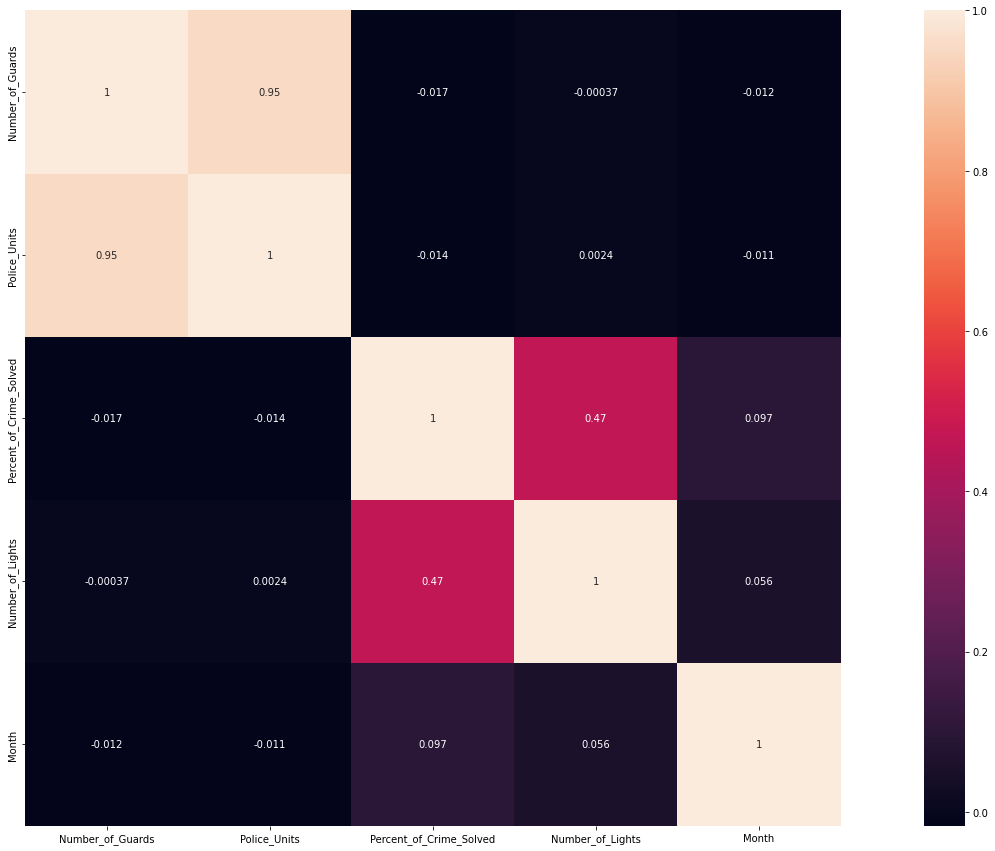

In [32]:
# посмотрим матрицу корреляций всех признаков таблицы, есть ли зависимость между какими либо признаками
cm = merged_df.corr() 
plt.figure(figsize=(30, 15))
sns.heatmap(cm, annot=True, square=True)
plt.show()

* Итак матрица корреляции не выявила зависимость между кол-вом охраны и полиции и кол-вом раскрытых преступлений, но видит не высокую корреляцию между кол-вом фонарей и процентом раскрытых преступлений, изучим эту зависимость также на скаттерплоте

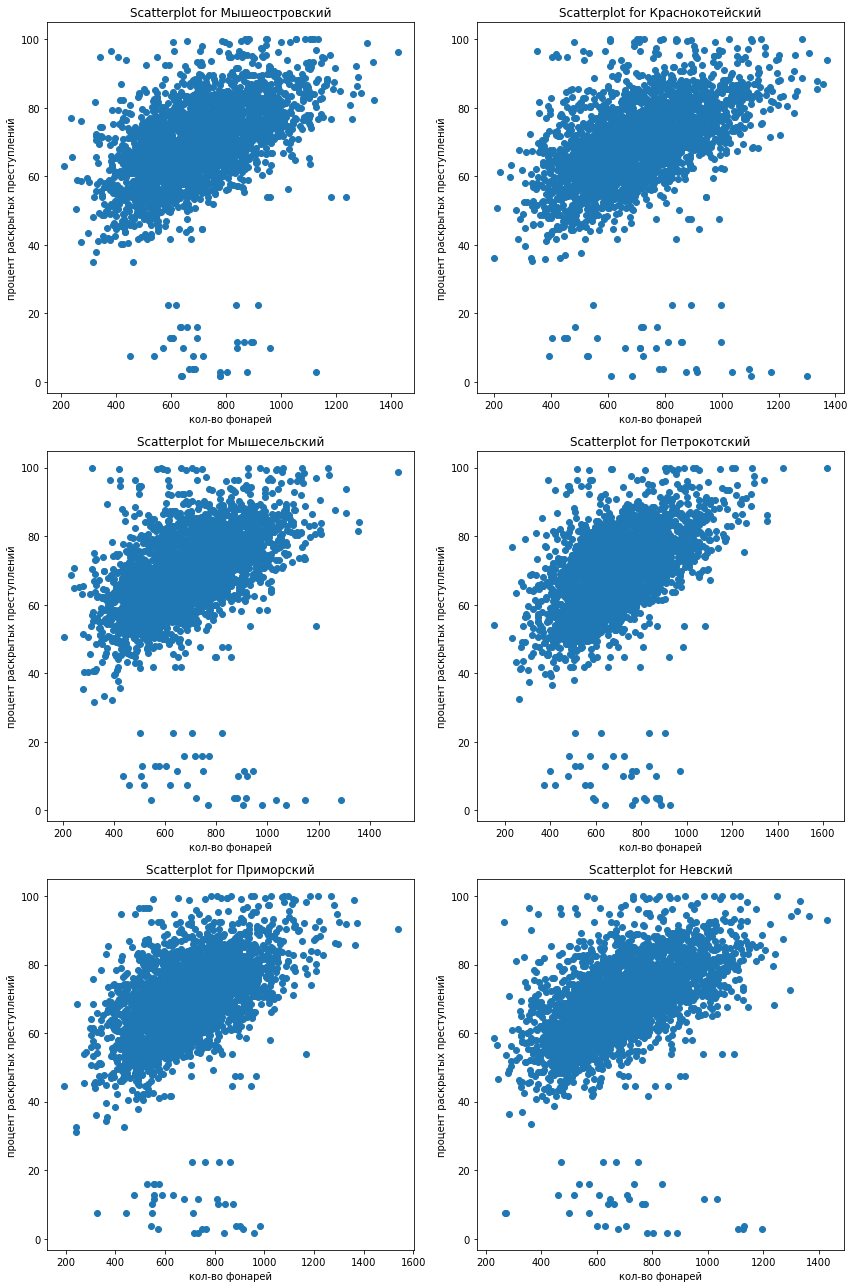

In [33]:
# Построим график скаттерполот для визуализации распределения процента раскрытых преступлений в зависимости 
# от кол-ва фонарей на районе, отдельно по каждому району
districts = merged_df['District'].unique()
num_rows = len(districts) // 2 + len(districts) % 2  
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 6 * num_rows))
for i, district in enumerate(districts):
    row = i // num_cols
    col = i % num_cols
    subset = merged_df[merged_df['District'] == district]
    axes[row, col].scatter(subset['Number_of_Lights'], subset['Percent_of_Crime_Solved'])
    axes[row, col].set_title(f'Scatterplot for {district}')
    axes[row, col].set_xlabel('кол-во фонарей')
    axes[row, col].set_ylabel('процент раскрытых преступлений')
plt.tight_layout()
plt.show()

* Здесь прослеживается линейная зависимость с выбросами между переменными но ее статистическую значимость еще предстоит доказать

* Но сперва хочу провести стат анализ влияния общего кол-ва охраны на процент раскрытых преступлений чтобы статистически доказать отсутствие либо наличие какой либо взаимосвязи, возможно если ни от кол-во полиции ни от кол-во охраны не зависит показатель раскрытия то он будет зависеть от их общего числа, для этого ввиду дополнительную переменную 'total_sec', это кол-во охраны плюс кол-во полиции на районе, проведем однофакторный дисперсионный  дисперсионный анализ между группами. Для этого сформируем две гипотезы:
- нулевую - между группами(число общего кол-во охраны) нет стат разницы относительно процента раскрытых преступлений
- альтернативную - есть стат разница между группами относительно процента раскрытых преступлений

In [34]:
# Вводим переменную общее кол-во охраны
merged_df['total_sec'] = merged_df['Number_of_Guards'] + merged_df['Police_Units']

In [35]:
# смтотрим получившися результат, кол-во групп 
merged_df['total_sec'].value_counts()

4     1328
6     1322
8     1312
16    1305
10    1276
14    1259
18    1258
12    1244
11     688
17     644
13     642
7      636
15     636
19     634
2      630
5      629
3      624
20     621
9      592
Name: total_sec, dtype: int64

In [36]:
# и дисперсию каждой из группы
grouped_data = merged_df.groupby('total_sec')['Percent_of_Crime_Solved']
# Вычисление дисперсии для каждой группы
group_variances = grouped_data.var()
# Вывод результатов
print(group_variances)

total_sec
2     161.297682
3     152.531132
4     161.149793
5     178.504345
6     142.307780
7     146.817570
8     141.053993
9     168.094342
10    160.073123
11    147.776885
12    142.766093
13    199.485678
14    188.818746
15    141.369281
16    173.658986
17    172.621950
18    162.811614
19    156.752139
20    168.888807
Name: Percent_of_Crime_Solved, dtype: float64


In [37]:
# Проведение однофакторного дисперсионного анализа (ANOVA)
# Группируем данные по столбцу 'группа' для анализа
grouped_data = [group['Percent_of_Crime_Solved'] for name, group in merged_df.groupby('total_sec')]

# Проводим однофакторный дисперсионный анализ
f_statistic, p_value = f_oneway(*grouped_data)

# Вывод результатов
print("F-статистика:", f_statistic)
print("p-значение:", p_value)

# Проверка на статистическую значимость (уровень значимости 0.05)
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу, есть статистически значимые различия между группами")
else:
    print("Нет статистически значимых различий между группами")

F-статистика: 1.1768930357446508
p-значение: 0.2703850667006011
Нет статистически значимых различий между группами


* Итак я доказал что нет зависимости между кол-вом полиции на районе, кол-вом охраны и их общего числа на процент раскрытых преступлений разбитых фонарей, осталось доказать или опровергнуть что кол-во фонарей может влиять на этот показатель. Для этого проведу регрессионый анализ чтобы посмотреть какой процент раскрытых преступлений обуславливается количеством фонарей

In [38]:
# Выполню регрессионый анализ с одним предиктором
X = merged_df['Number_of_Lights'].values.reshape(-1, 1)  # Независимая переменная
y = merged_df['Percent_of_Crime_Solved'].values  # Зависимая переменная

# Инициализация модели линейной регрессии
model = LinearRegression()

# Обучение модели на данных
model.fit(X, y)

# Получение коэффициентов регрессии
coef = model.coef_  # Коэффициент наклона
intercept = model.intercept_  # Пересечение с осью y

# Предсказание значений y на основе X
y_pred = model.predict(X)

# Рассчет коэффициента детерминации (R^2)
r_squared = r2_score(y, y_pred)

print(f"Коэффициенты регрессии: наклон = {coef[0]}, пересечение = {intercept}")
print(f"Коэффициент детерминации (R^2): {r_squared}")

Коэффициенты регрессии: наклон = 0.03325278804946176, пересечение = 45.90190385502662
Коэффициент детерминации (R^2): 0.2167139097822426


In [39]:
data = merged_df
result = sm.ols(formula="y ~ X", data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     4780.
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:05:05   Log-Likelihood:                -66292.
No. Observations:               17280   AIC:                         1.326e+05
Df Residuals:                   17278   BIC:                         1.326e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.9019      0.346    132.526      0.0

# Вывод
Получившийся коэффициент детерминации 0.216 описывает какая часть процента раскрытых преступлений обусловлена количеством фонарей, пересечение = 45.9 показывает что если бы кол-во фонарей равнялось нулю то среднее кол-во раскрытых преступлений было бы равно 46%, наклон = 0.033 показывает что с каждым увелечением кол-ва фонарей процент раскрытых преступлений возрастает на 0,03%. Регрессия имеет статистическую значимость но интерпритировать ее как совет к увелечению кол-ва фонарей на районах для предотвращения краж я не могу, в силу не высокой описательной способности и отсутствия данных по кражам и по разбитым фонарям, обладай я этими данными возможно получилось бы увеличить мощность теста и более детально установить причнно-следственную связь между этими факторами. В завершении анализа хочу отметить что не могу рекомендовать увелечение числа полиции так как не имея данных по кражам не знаю о связи между кол-вом полиции и кол-вом краж, так же как не знаю есть ли связь между разбтыми фонарями и кражами. Могу лишь отметить что ни кол-во охраны на районе ни кол-во полиции и общая их численность не влияют процент раскрытых преступлений по разбитым фонарям и что показатель среднего процента раскрытых преступлений довольно волатилен от месяца к месяцу одинаково для всех районов.